### **1. Importações**

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.colors import Normalize

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2


In [2]:
base = pd.read_csv("../data/categoria_cabbage.csv")
base['Date'] = pd.to_datetime(base['Date'], format="%Y-%m-%d")
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana,Ano
0,2020-07-01,09:33,102900005116714,0.329,14.0,sale,No,1,7,9,4.61,Broccoli,Cabbage,Wednesday,2020
1,2020-07-01,09:36,102900011009970,0.445,9.0,sale,No,1,7,9,4.00,Qinggengsanhua,Cabbage,Wednesday,2020
2,2020-07-01,09:46,102900005116714,0.522,14.0,sale,No,1,7,9,7.31,Broccoli,Cabbage,Wednesday,2020
3,2020-07-01,09:46,102900011009970,0.368,9.0,sale,No,1,7,9,3.31,Qinggengsanhua,Cabbage,Wednesday,2020
4,2020-07-01,09:51,102900005116714,0.236,14.0,sale,No,1,7,9,3.30,Broccoli,Cabbage,Wednesday,2020


### **2. Visualizando os produtos mais vendidos no decorrer das horas**
- A % é baseada na porcentagem de vendas total do produto

In [3]:
tabela_vendas_por_hora = base.pivot_table(index='Item Name', columns='Hora', aggfunc='size', fill_value=0)

tabela_vendas_por_hora.columns = [f'{hora}h' for hora in tabela_vendas_por_hora.columns]
total_vendas_por_produto = tabela_vendas_por_hora.sum(axis=1)
percentual_vendas_por_hora = tabela_vendas_por_hora.div(total_vendas_por_produto, axis=0) * 100
percentual_vendas_por_hora = percentual_vendas_por_hora.round(2)
vendidos = pd.DataFrame(base['Item Name'].value_counts())
percentual_vendas_por_hora = pd.merge(percentual_vendas_por_hora, vendidos,how='left', on='Item Name')

percentual_vendas_por_hora.head()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
Item Name,,,,,,,,,,,,,,,
Broccoli,7.86,13.57,11.11,5.74,4.34,4.84,7.01,9.29,10.60,9.92,7.43,6.36,1.90,0.01,58905
Purple Cabbage (1),8.33,12.50,8.33,4.17,8.33,8.33,4.17,16.67,4.17,12.50,8.33,0.00,4.17,0.00,24
Purple Cabbage (2),0.00,0.00,0.00,50.00,0.00,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
Qinggengsanhua,9.38,14.53,11.34,5.47,4.18,5.04,7.27,9.54,9.94,8.92,6.21,6.39,1.73,0.05,15270
Zhijiang Qinggengsanhua,7.92,12.78,9.69,5.18,4.09,4.99,6.75,8.13,9.19,8.72,8.60,9.69,4.20,0.06,12369


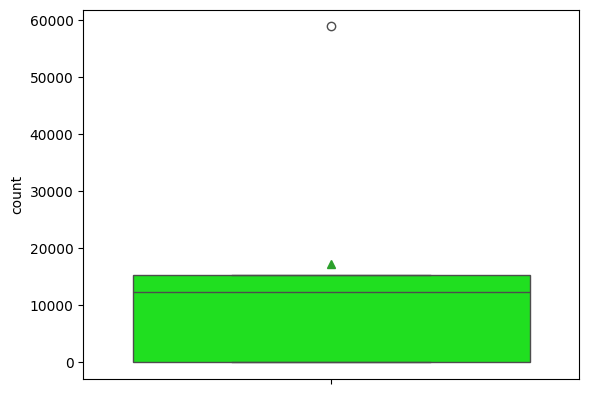

In [4]:
sns.boxplot(percentual_vendas_por_hora['count'], showmeans=True, color='lime')
plt.savefig("../images/03_02_EDA_cabbage_01_distribuicao.png")

In [5]:
percentual_vendas_por_hora.describe()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,6.698000,10.676000,8.094000,14.112000,4.188000,4.640000,15.04000,8.726000,6.780000,8.012000,6.114000,4.488000,2.400000,0.02400,17314.000000
std,3.793523,6.019953,4.683709,20.070794,2.946535,2.977759,19.58275,5.928451,4.559786,4.724947,3.543054,4.314716,1.791075,0.02881,24274.944315
min,0.000000,0.000000,0.000000,4.170000,0.000000,0.000000,4.17000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000
25%,7.860000,12.500000,8.330000,5.180000,4.090000,4.840000,6.75000,8.130000,4.170000,8.720000,6.210000,0.000000,1.730000,0.00000,24.000000
50%,7.920000,12.780000,9.690000,5.470000,4.180000,4.990000,7.01000,9.290000,9.190000,8.920000,7.430000,6.360000,1.900000,0.01000,12369.000000
75%,8.330000,13.570000,11.110000,5.740000,4.340000,5.040000,7.27000,9.540000,9.940000,9.920000,8.330000,6.390000,4.170000,0.05000,15270.000000
max,9.380000,14.530000,11.340000,50.000000,8.330000,8.330000,50.00000,16.670000,10.600000,12.500000,8.600000,9.690000,4.200000,0.06000,58905.000000


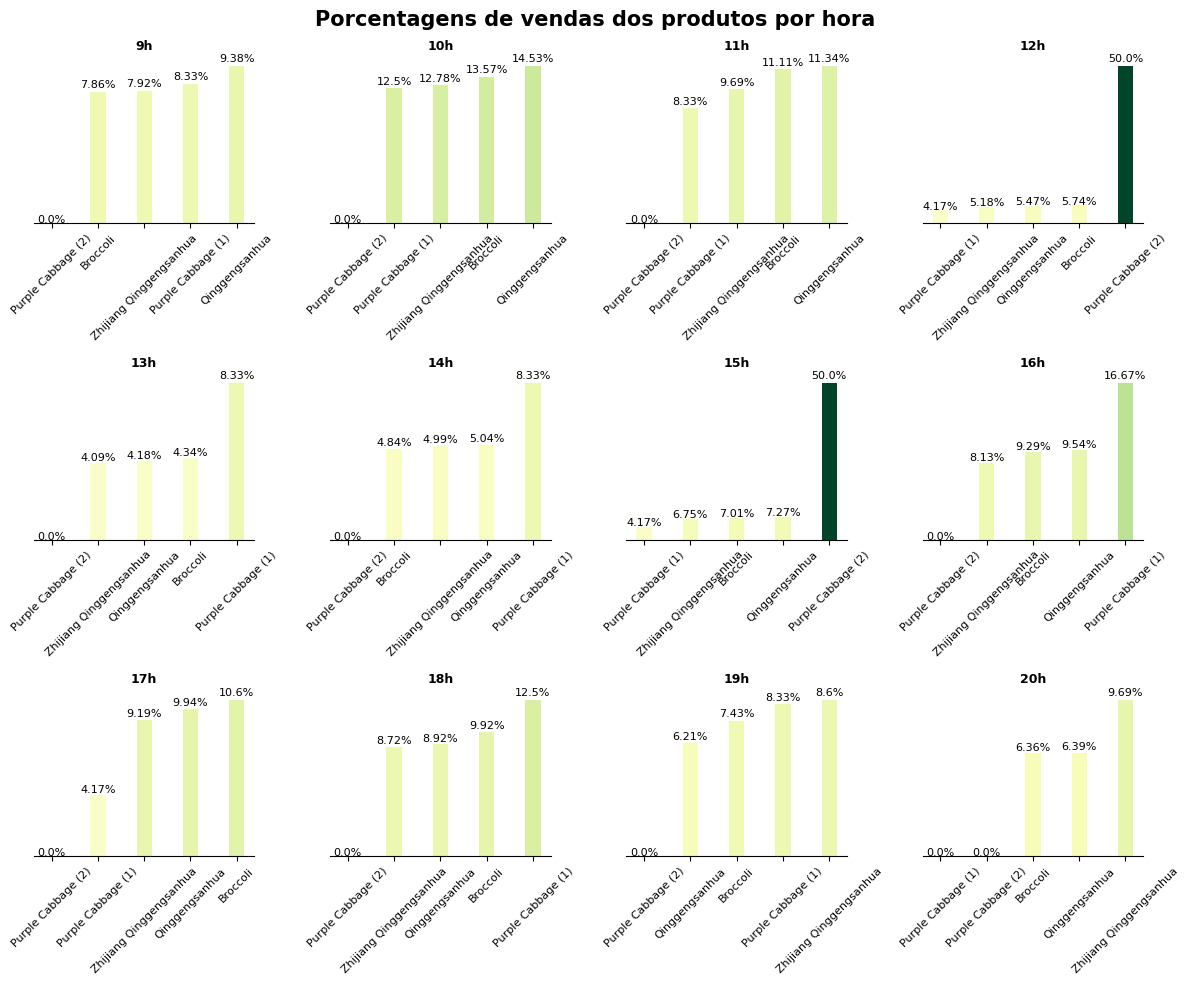

In [6]:
horas = ['9h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h']

fig,axs = plt.subplots(ncols=4,nrows=3,figsize=(12,10),tight_layout=True)

for hora,ax in zip(horas,axs.flat):
    
    b = percentual_vendas_por_hora[hora]
    a = b.sort_values(ascending=False).head(5).sort_values()
    norm = Normalize(vmin=0, vmax=50)
    cmap = plt.get_cmap('YlGn')  
    colors = cmap(norm(a.values))
    w = 0.33
    ax.bar(a.index, a.values, color=colors, width=w)
    ax.set_title(f'{hora}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(f'{a.values[i]}%',(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=45, fontsize=8)
plt.suptitle("Porcentagens de vendas dos produtos por hora", fontsize=15, fontweight='bold')
plt.savefig("../images/03_02_EDA_cabbage_02_porcentagem_vendas_produtos.png")
plt.show()

### **3. Analisando as vendas, agrupadas pelo dia da semana**

In [7]:
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana,Ano
0,2020-07-01,09:33,102900005116714,0.329,14.0,sale,No,1,7,9,4.61,Broccoli,Cabbage,Wednesday,2020
1,2020-07-01,09:36,102900011009970,0.445,9.0,sale,No,1,7,9,4.00,Qinggengsanhua,Cabbage,Wednesday,2020
2,2020-07-01,09:46,102900005116714,0.522,14.0,sale,No,1,7,9,7.31,Broccoli,Cabbage,Wednesday,2020
3,2020-07-01,09:46,102900011009970,0.368,9.0,sale,No,1,7,9,3.31,Qinggengsanhua,Cabbage,Wednesday,2020
4,2020-07-01,09:51,102900005116714,0.236,14.0,sale,No,1,7,9,3.30,Broccoli,Cabbage,Wednesday,2020


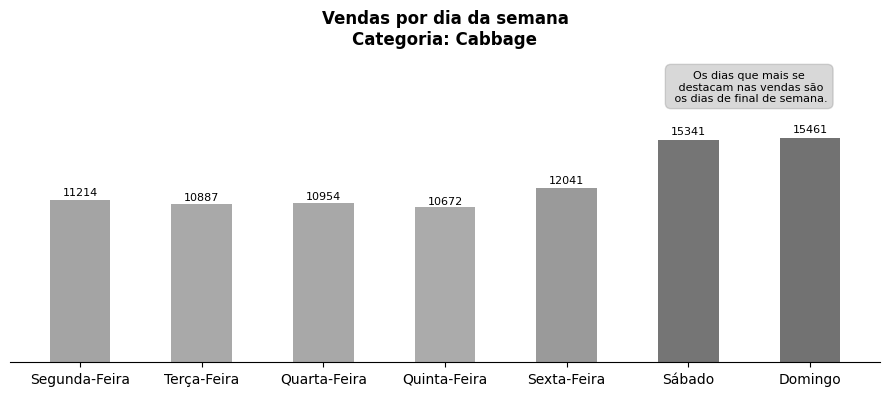

In [8]:
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo']

a = base['Dia da semana'].value_counts().sort_index()
ind = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
a = a.reindex(ind)

fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.6)
cmap = plt.get_cmap('Greys')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors, width=0.5)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(titulos)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(5.5, 18000, "Os dias que mais se\n destacam nas vendas são\n os dias de final de semana.", ha='center',fontsize=8,
        bbox=dict(facecolor='grey', edgecolor='grey', alpha=0.3, boxstyle='round,pad=0.5'))

plt.suptitle("Vendas por dia da semana\nCategoria: Cabbage", fontweight='bold', fontsize=12)
plt.savefig("../images/03_02_EDA_cabbage_03_vendas_dia_semana.png")
plt.show()

### **4. Visualizando os produtos mais vendidos dessa categoria**

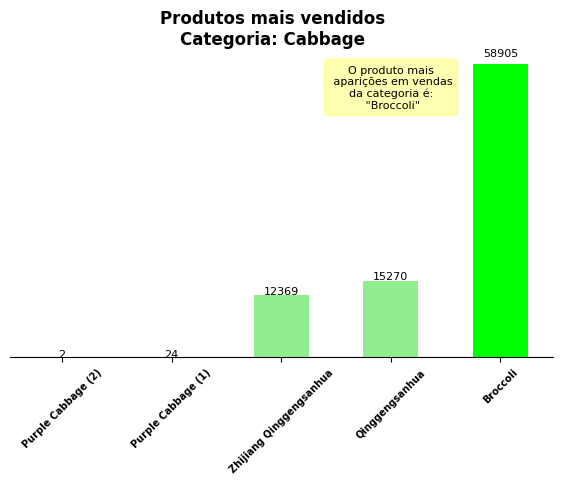

In [9]:
a = base['Item Name'].value_counts().sort_values(ascending=False).head(10).sort_values()

fig, ax = plt.subplots(figsize=(7,4))

ax.bar(a.index, a.values, color='lightgreen', width=0.5)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(labels=a.index, rotation=45, fontsize=7, fontweight='bold')
ax.bar(a.index[-1],a.values[-1], color='lime',alpha=1, width=0.5)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

# ax.text(7.3, 33000, 'O produto mais\n aparições em vendas\nda categoria é:\n "Net Lotus Root (1)"', ha='center',fontsize=8,
        # bbox=dict(facecolor='yellow',edgecolor='yellow',alpha=0.3, boxstyle='round,pad=0.5'))
plt.suptitle("Produtos mais vendidos\nCategoria: Cabbage", fontweight='bold', fontsize=12)
ax.text(3, 50000, f'O produto mais\n aparições em vendas\nda categoria é:\n "{a.index[-1]}"', ha='center',fontsize=8,
        bbox=dict(facecolor='yellow',edgecolor='yellow',alpha=0.3, boxstyle='round,pad=0.5'))
plt.savefig("../images/03_02_EDA_cabbage_04_produtos_mais_vendidos.png")
plt.show()

In [10]:
base_sale = base.loc[base['Sale or Return'] == 'sale']
base_datas = base.set_index('Date')
base_datas = base_datas.resample('ME').count()

### **5. Analisando o total arrecadado com as vendas**

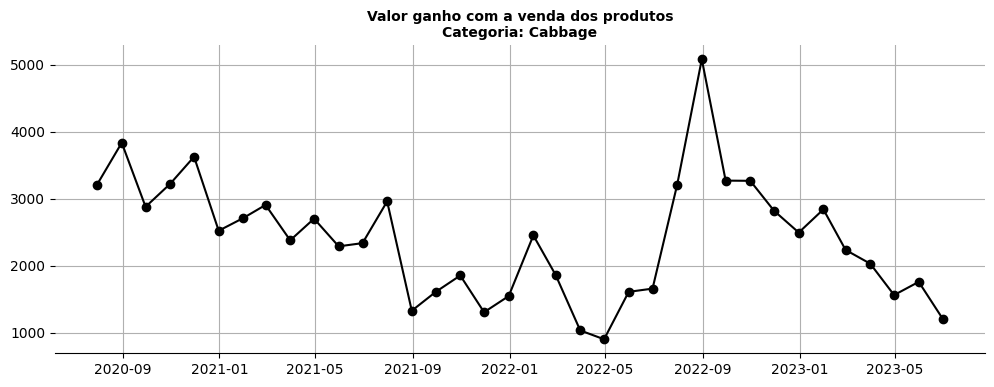

In [11]:
base_sale = base.loc[base['Sale or Return'] == 'sale']
base_datas = base_sale.set_index('Date')
base_datas = base_datas.resample('ME').count()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(base_datas['Total'], marker='o', color='black')
ax.set_title("Valor ganho com a venda dos produtos\nCategoria: Cabbage", fontsize=10, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.grid()
plt.savefig("../images/03_02_EDA_cabbage_05_valor_ganho_vendas.png")
plt.show()

### **6. Analisando as vendas agrupadas pelos meses**


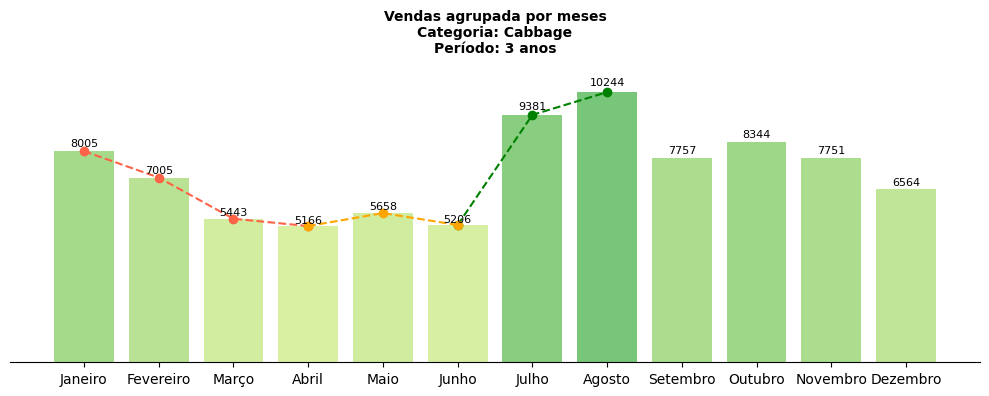

In [12]:
a = base_sale['Mês'].value_counts().sort_index()
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('YlGn')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.plot(a.index[:4],a.values[:4], 'o--', color='tomato', alpha=1)
ax.plot(a.index[5:8],a.values[5:8], 'o--', color='green', alpha=1)
ax.plot(a.index[3:6],a.values[3:6], 'o--', color='orange', alpha=1)
plt.suptitle("Vendas agrupada por meses\nCategoria: Cabbage\nPeríodo: 3 anos", fontweight='bold', fontsize=10)
plt.savefig("../images/03_02_EDA_cabbage_06_vendas_meses.png")
plt.show()

### **7. Analisando as vendas agrupadas pelo ano e mês**

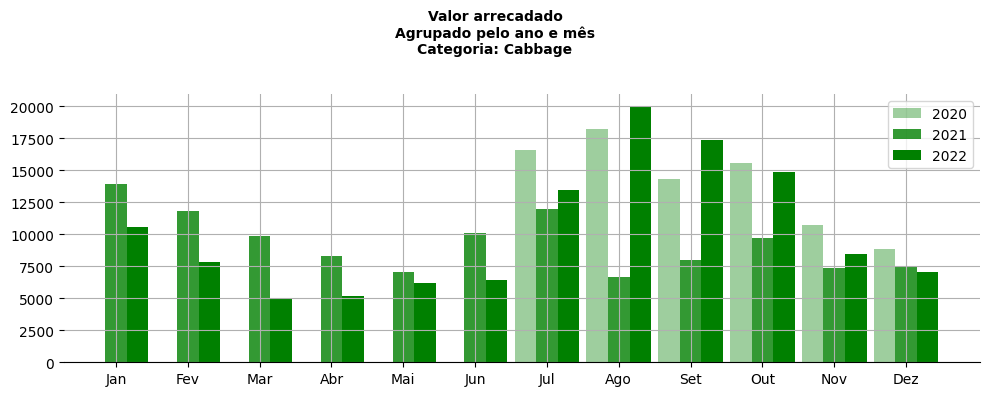

In [26]:
a = base_sale.groupby(["Ano","Mês"])['Total'].sum().reset_index()

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

vinte = a.loc[a.Ano == 2020]
vinteeum = a.loc[a.Ano == 2021]
vinteedois = a.loc[a.Ano == 2022]

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('Blues')
colors = cmap(norm(a.values))

w = 0.3
ax.grid()
ax.bar(vinte['Mês']-w, vinte['Total'], color="green", width=w, label="2020", alpha=0.38)
ax.bar(vinteeum['Mês'], vinteeum['Total'], color="green", width=w, label="2021", alpha=0.8)
ax.bar(vinteedois['Mês']+w, vinteedois['Total'], color="green", width=w, label="2022")
ax.spines[['top','right','left']].set_visible(False)
ax.legend()
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)

plt.suptitle("Valor arrecadado\nAgrupado pelo ano e mês\nCategoria: Cabbage\n", fontweight='bold', fontsize=10)
plt.savefig("../images/03_02_EDA_cabbage_07_vendas_ano_mes.png")
plt.show()

### **8. Analisando os dois produtos com maiores taxas de perdas**

In [20]:
produtos_categoria = base['Item Name'].unique()

taxa_perdas = pd.read_csv("../data/annex4.csv")
taxa_perdas = taxa_perdas.loc[taxa_perdas['Item Name'].isin(produtos_categoria)]

In [21]:
taxa_perdas.sort_values(by='Loss Rate (%)', ascending=False).head(3)

,Item Code,Item Name,Loss Rate (%)
59,102900011000632,Purple Cabbage (1),25.53
87,102900011009970,Qinggengsanhua,17.06
189,102900011033913,Purple Cabbage (2),9.43


#### **8.1 Purple Cabbage (1)**

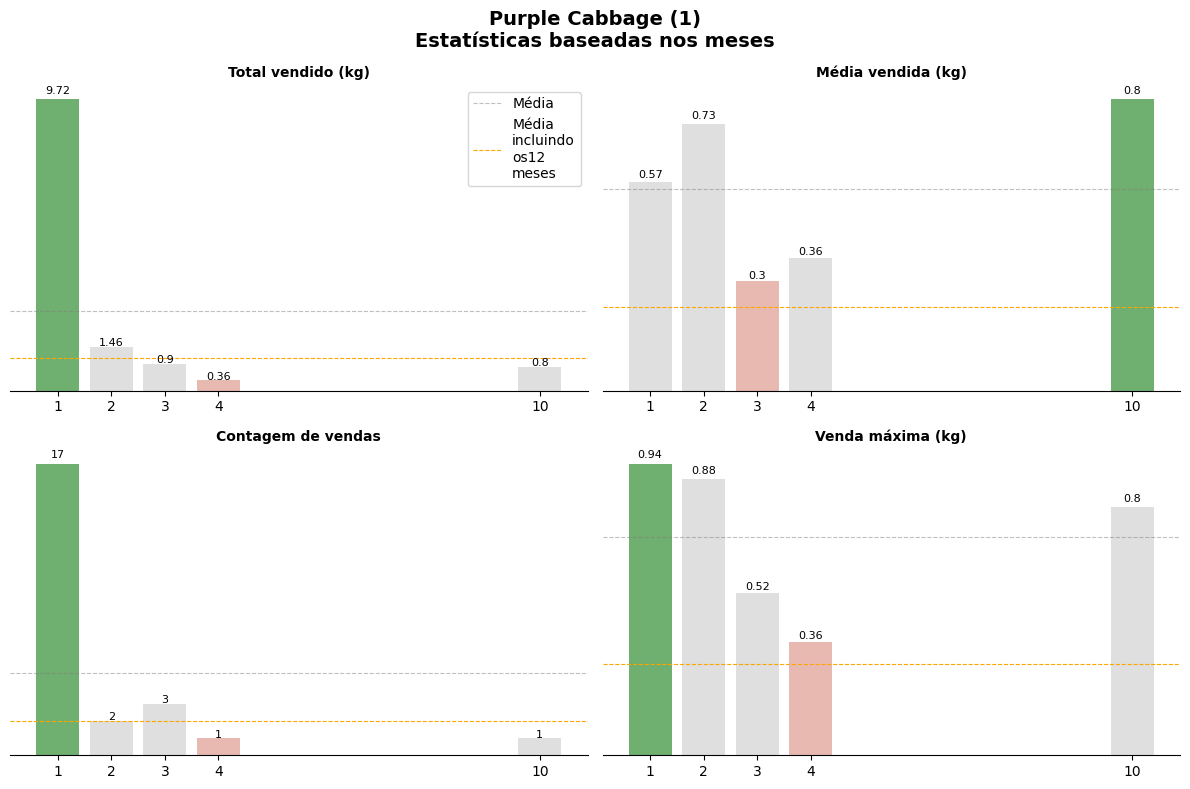

In [22]:
import sys 
sys.path.append("../functions/")
from funcoes import estatisticas_produto

estatisticas_produto(base, "Purple Cabbage (1)", salvar=True,
                     salvar_como="03_02_EDA_cabbage_08_purple_cabbage_1_1")

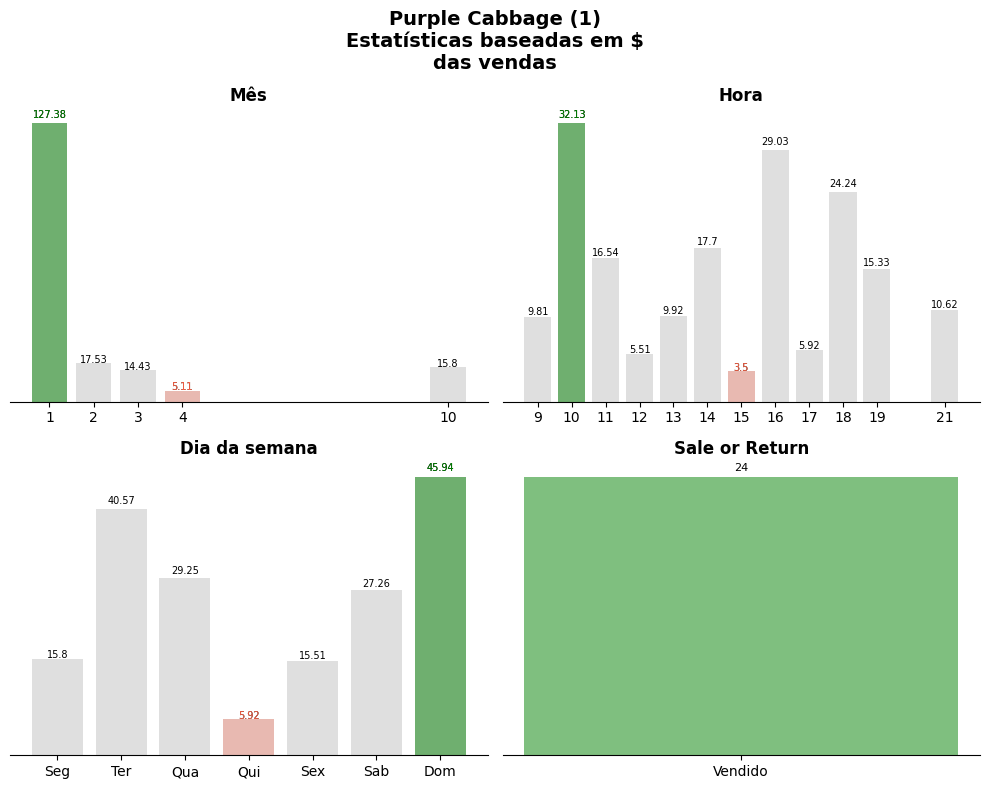

In [23]:
sys.path.append('../functions/')
from funcoes import estatisticas_produto_dois

estatisticas_produto_dois(base, "Purple Cabbage (1)", salvar=True,
                     salvar_como="03_02_EDA_cabbage_09_purple_cabbage_1_2")

#### **8.2. Qinggengsanhua**

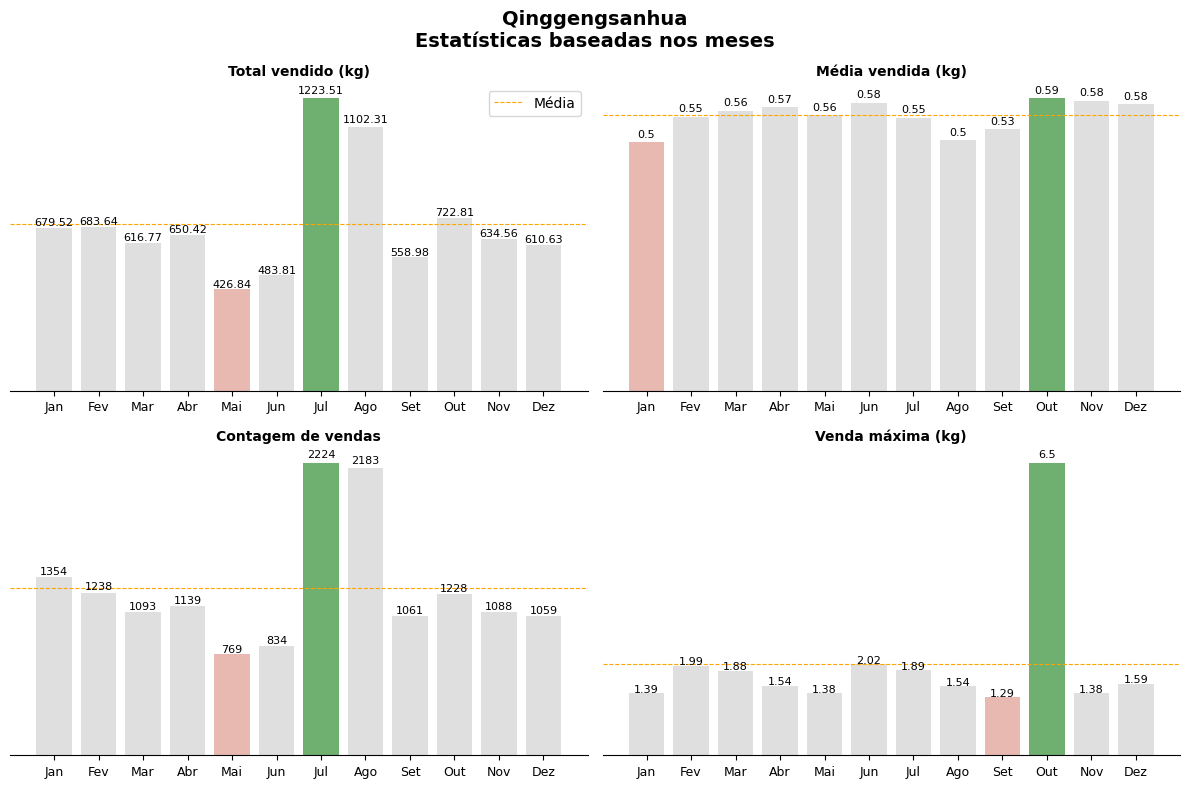

In [27]:
estatisticas_produto(base, "Qinggengsanhua", salvar=True,
                     salvar_como="03_02_EDA_cabbage_10_qinggengsanhua_1")

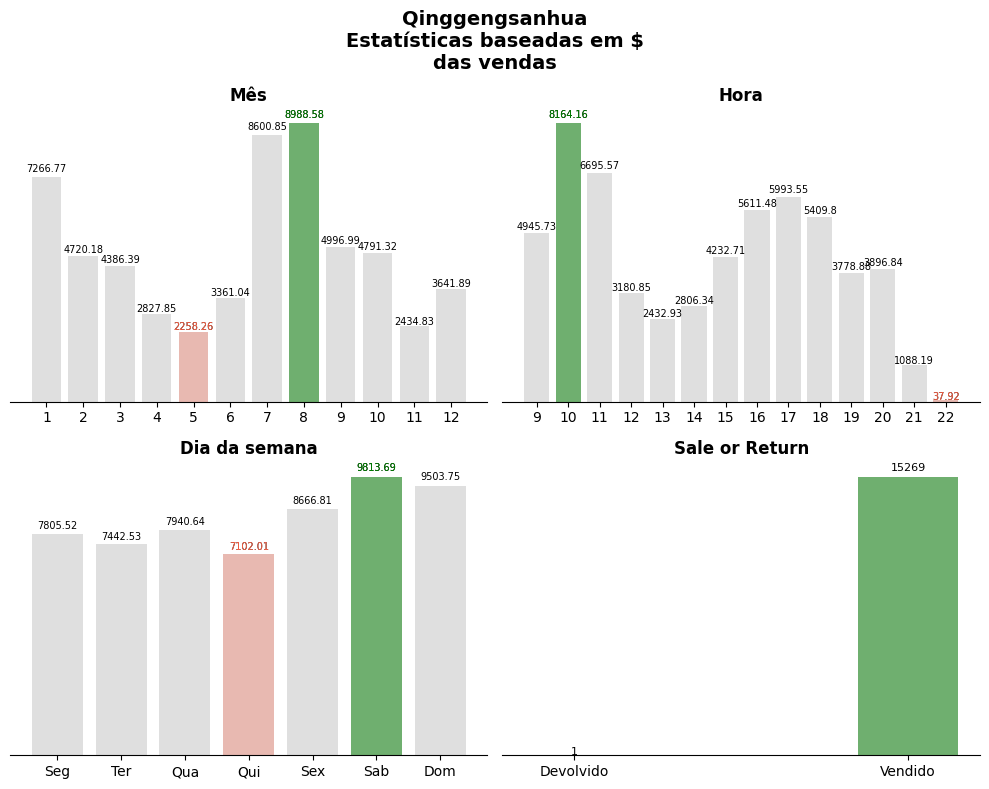

In [28]:
estatisticas_produto_dois(base, "Qinggengsanhua", salvar=True,
                     salvar_como="03_02_EDA_cabbage_11_qinggengsanhua_2")